In [ ]:
import matplotlib.pylab as plt
import numpy as np

single_point = [0,0]
# list of points on a circle around the origin
circle_points = []
for i in range(0, 380, 20):
    circle_points.append([np.cos(np.deg2rad(i))/2, np.sin(np.deg2rad(i))/2])

circle_points = np.array(circle_points)

# create circle shell around origi

# Generate 3D data
phi_values = np.linspace(0, 2 * np.pi, 10)
theta_values = np.linspace(0, np.pi, 10)
phi, theta = np.meshgrid(phi_values, theta_values)
x_3d = np.sin(theta) * np.cos(phi)
y_3d = np.sin(theta) * np.sin(phi)
z_3d = np.cos(theta)


fig, axes = plt.subplots(1,3, figsize=(15,5))
axes[0].plot(single_point[0], single_point[1], 'o', color='black', markersize=20)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].plot(circle_points[:,0], circle_points[:,1], 'o', color='black', markersize=20)
axes[1].plot(circle_points[:,0], circle_points[:,1], '-', color='black', markersize=10)
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[2].set_xticks([])
axes[2].set_yticks([])
axes_3d = fig.add_subplot(1,3,3, projection='3d')
axes_3d.plot_surface(x_3d,y_3d,z_3d, cmap='gray')
axes_3d.view_init(30, 30)
axes_3d.axis('off')
axes_3d.set_xticks([])
axes_3d.set_yticks([])
plt.tight_layout()
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(single_point[0], single_point[1], 'o', color='black', markersize=20)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(circle_points[:,0], circle_points[:,1], 'o', color='black', markersize=20)
plt.plot(circle_points[:,0], circle_points[:,1], '-', color='black', markersize=10)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
axes_3d = plt.subplot(1,1,1, projection='3d')
axes_3d.plot_surface(x_3d,y_3d,z_3d, cmap='gray')
axes_3d.view_init(30, 30)
axes_3d.axis('off')
axes_3d.set_xticks([])
axes_3d.set_yticks([])
plt.show()

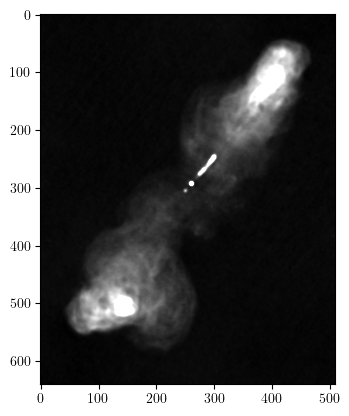

In [34]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import gudhi

PATH = '/Users/rs17612/Documents/Radio_Data/3CRR/3C219'

# Load the data
data = fits.open(PATH)[0].data[0,0,:,:]

plt.imshow(data, cmap='gray',vmax=0.1*np.max(data))
plt.show()


In [58]:
# calculate persistence diagram 
# and plot persistence diagram for the 
import cripser
from astropy.stats import mad_std 
import pandas as pd
img = -data
perisi = cripser.computePH(img)
local_bg = mad_std(img)
perisi = pd.DataFrame(perisi,columns=['dim','birth','death','x1','y1','z1','x2','y2','z2'])
perisi['birth'] = -perisi['birth']
perisi['death'] = -perisi['death'] 
perisi['lifetime'] = abs(perisi['death'] - perisi['birth'])
perisi.sort_values(by='lifetime',ascending=False,inplace=True)
perisi.reset_index(inplace=True)
# change index 0 row death to 0
perisi.loc[0,'death'] = 0
# filtr birth by local background
#perisi = perisi[perisi['birth'] > local_bg]
perisi

,index,dim,birth,death,x1,y1,z1,x2,y2,z2,lifetime
0,5413,0.0,0.064306,0.000000,105.0,414.0,0.0,0.0,0.0,0.0,1.797693e+308
1,521,0.0,0.036553,0.000789,293.0,261.0,0.0,286.0,265.0,0.0,3.576397e-02
2,224,0.0,0.025864,0.001614,248.0,300.0,0.0,239.0,305.0,0.0,2.425041e-02
3,595,0.0,0.020892,0.000639,515.0,140.0,0.0,310.0,262.0,0.0,2.025250e-02
4,20,0.0,0.014646,0.006820,269.0,282.0,0.0,264.0,288.0,0.0,7.826464e-03
...,...,...,...,...,...,...,...,...,...,...,...
9169,7538,1.0,0.000005,0.000005,473.0,463.0,0.0,474.0,462.0,0.0,3.248715e-09
9170,5042,0.0,-0.000028,-0.000028,611.0,3.0,0.0,612.0,3.0,0.0,3.103196e-09
9171,546,0.0,0.000751,0.000751,262.0,362.0,0.0,263.0,362.0,0.0,1.979060e-09
9172,4636,0.0,-0.000010,-0.000010,185.0,168.0,0.0,186.0,168.0,0.0,4.620233e-10


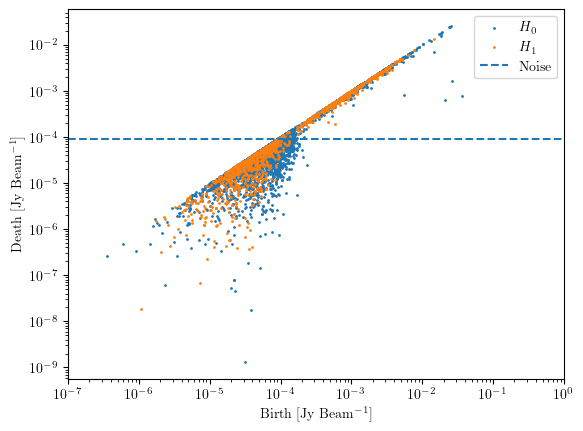

In [65]:
x0 = perisi[perisi['dim']==0].birth.to_list()
y0 = perisi[perisi['dim']==0].death.to_list()
x1 = perisi[perisi['dim']==1].birth.to_list()
y1 = perisi[perisi['dim']==1].death.to_list()

plt.scatter(x0,y0,label = '$H_{0}$',s=1)
plt.scatter(x1,y1,label = '$H_{1}$',s=1)
plt.axhline(local_bg,linestyle='--',label='Noise')
plt.xlabel('Birth [Jy Beam$^{-1}$]')
plt.ylabel('Death [Jy Beam$^{-1}$]')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1E-7,1)
plt.legend()
plt.show()

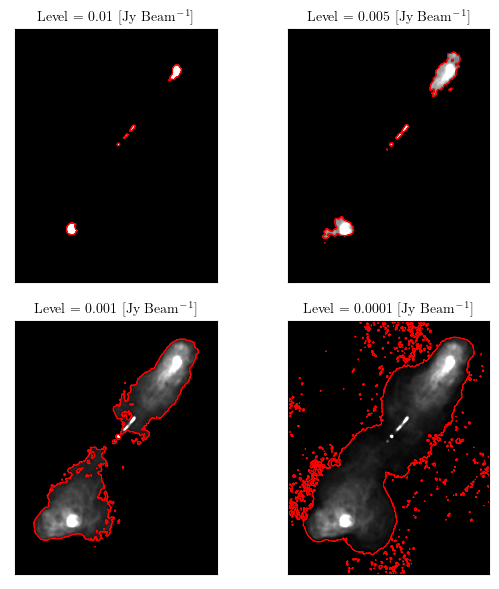

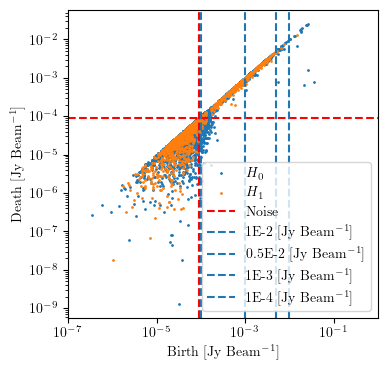

In [103]:
#mask = np.zeros(data.shape)
fig, ax = plt.subplots(2,2,figsize=(6,6))
level = [1E-2,0.5E-2,1E-3,1E-4]
for i in range(0,len(level)):
    row = int(i/2)
    col = i%2
    mask = np.zeros(data.shape)
    mask[data>level[i]] = 1

    img_mask = mask*data
    ax[row,col].imshow(img_mask,cmap='gray',vmax=0.01)
    ax[row,col].contour(mask,colors='r',linewidths=0.5)
    ax[row,col].set_title('Level = '+str(level[i])+' [Jy Beam$^{-1}$]',fontsize=10)
    ax[row,col].set_xticks([])
    ax[row,col].set_yticks([])
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(x0,y0,label = '$H_{0}$',s=1)
plt.scatter(x1,y1,label = '$H_{1}$',s=1)
plt.axhline(local_bg,color='r',linestyle='--',label='Noise')
plt.axvline(local_bg,color='r',linestyle='--')
plt.axvline(level[0],linestyle='--',label='1E-2 [Jy Beam$^{-1}$]')
plt.axvline(level[1],linestyle='--',label='0.5E-2 [Jy Beam$^{-1}$]')
plt.axvline(level[2],linestyle='--',label='1E-3 [Jy Beam$^{-1}$]')
plt.axvline(level[3],linestyle='--',label='1E-4 [Jy Beam$^{-1}$]')
plt.xlabel('Birth [Jy Beam$^{-1}$]')
plt.ylabel('Death [Jy Beam$^{-1}$]')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1E-7,1)
plt.legend()
plt.show()